In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import re
from keras.preprocessing import sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from sklearn.svm import LinearSVC

In [5]:
names=['URL','Category']
df=pd.read_csv('URL Classification.csv',names=names, na_filter=False)
df1 = df[1:2000]
df2 = df[50000:52000]
df3 = df[520000:522000]
df4 =df[535300:537300]
df5 = df[650000:652000]
df6= df[710000:712000]
df7=  df[764200:766200]
df8=  df[793080:795080]
df9=  df[839730:841730]
df10=  df[850000:852000]
df11=  df[955250:957250]
df12=  df[1013000:1015000]
df13=  df[1143000:1145000]
df14=  df[1293000:1295000]
df15=  df[1492000:1494000]
#df6 = df[77000:1562978]
dt=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15], axis=0)
df.drop(df.index[1:2000],inplace= True)
df.drop(df.index[50000:52000],inplace= True)
df.drop(df.index[520000:522000],inplace= True)
df.drop(df.index[535300:537300],inplace= True)
df.drop(df.index[650000:652000],inplace= True)
df.drop(df.index[710000:712000],inplace= True)
df.drop(df.index[764200:766200],inplace= True)
df.drop(df.index[793080:795080],inplace= True)
df.drop(df.index[839730:841730],inplace= True)
df.drop(df.index[850000:852000],inplace= True)
df.drop(df.index[955250:957250],inplace= True)
df.drop(df.index[1013000:1015000],inplace= True)
df.drop(df.index[1143000:1145000],inplace= True)
df.drop(df.index[1293000:1295000],inplace= True)
df.drop(df.index[1492000:1494000],inplace= True)
df.tail()

,URL,Category
1562974,http://www.maxpreps.com/,Sports
1562975,http://www.myscore.com/,Sports
1562976,http://sportsillustrated.cnn.com/highschool,Sports
1562977,http://rss.cnn.com/rss/si_highschool?format=xml,Sports
1562978,http://www.usatoday.com/sports/preps/,Sports


Text(0, 0.5, 'Total Number Of Individual Category')

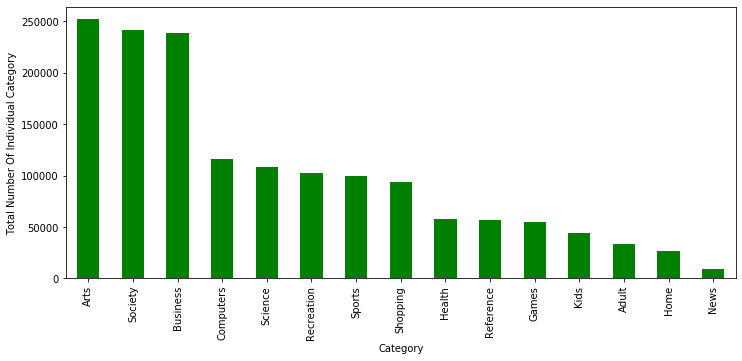

In [6]:
df.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category')

Text(0, 0.5, 'Total Number Of Individual Category')

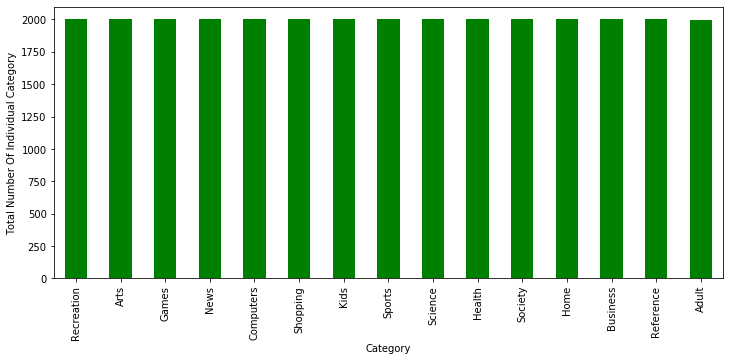

In [7]:
dt.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category')

In [8]:
X_train=df['URL']
y_train=df['Category']
#print(X_train)
X_train.shape

(1532979,)

In [9]:
X_test=dt['URL']
y_test=dt['Category']
#print(X_test)
X_test.shape

(29999,)

In [10]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 5
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search)
gs_clf = gs_clf.fit(X_train, y_train)

C:\Users\Shaurov\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(df['URL'], df['Category'],test_size=0.3, random_state = 0)

In [ ]:
#y=np.array(df[names[1]])
#print(y)

#from sklearn.pipeline import Pipeline
#from sklearn.multiclass import OneVsRestClassifier
#from nltk.corpus import stopwords
#stop_words = set(stopwords.words('english'))

#text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
#text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None)))])
#text_clf= Pipeline([
                #('tfidf', TfidfVectorizer(stop_words=stop_words)),
                #('clf', OneVsRestClassifier(MultinomialNB(
                   # fit_prior=True, class_prior=None))),
            #])
#text_clf = text_clf.fit(X_train, y_train)
#test_clf =text_clf.fit(X_test, y_test)

In [ ]:
#text_clf.get_params().keys()

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV
#n_iter_search = 5
#parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__estimator__alpha': (1e-2, 1e-3)}
#parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__estimator__alpha': (1e-2, 1e-3)}
#gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search)
#gs_clf = gs_clf.fit(X_train, y_train)

In [ ]:
#print(X_test)

In [12]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
#grid_mean_scores = [result.mean_validation_score for result in gs_clf.grid_scores_]
#print(grid_mean_scores)
y_pred=gs_clf.predict(X_test)
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.9129976320559158, 0.8877629254308477, 0.8763686541197341, None)

In [11]:
y_pred=gs_clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      Adult       0.99      0.19      0.32      1999
       Arts       0.55      0.92      0.69      2000
   Business       0.76      1.00      0.86      2000
  Computers       0.94      0.97      0.95      2000
      Games       0.97      0.96      0.96      2000
     Health       0.99      0.98      0.98      2000
       Home       0.97      0.93      0.95      2000
       Kids       0.94      0.72      0.81      2000
       News       0.99      0.84      0.91      2000
 Recreation       0.95      0.99      0.97      2000
  Reference       0.87      0.95      0.91      2000
    Science       0.94      0.95      0.95      2000
   Shopping       0.98      0.99      0.98      2000
    Society       0.87      1.00      0.93      2000
     Sports       0.98      0.95      0.96      2000

avg / total       0.91      0.89      0.88     29999



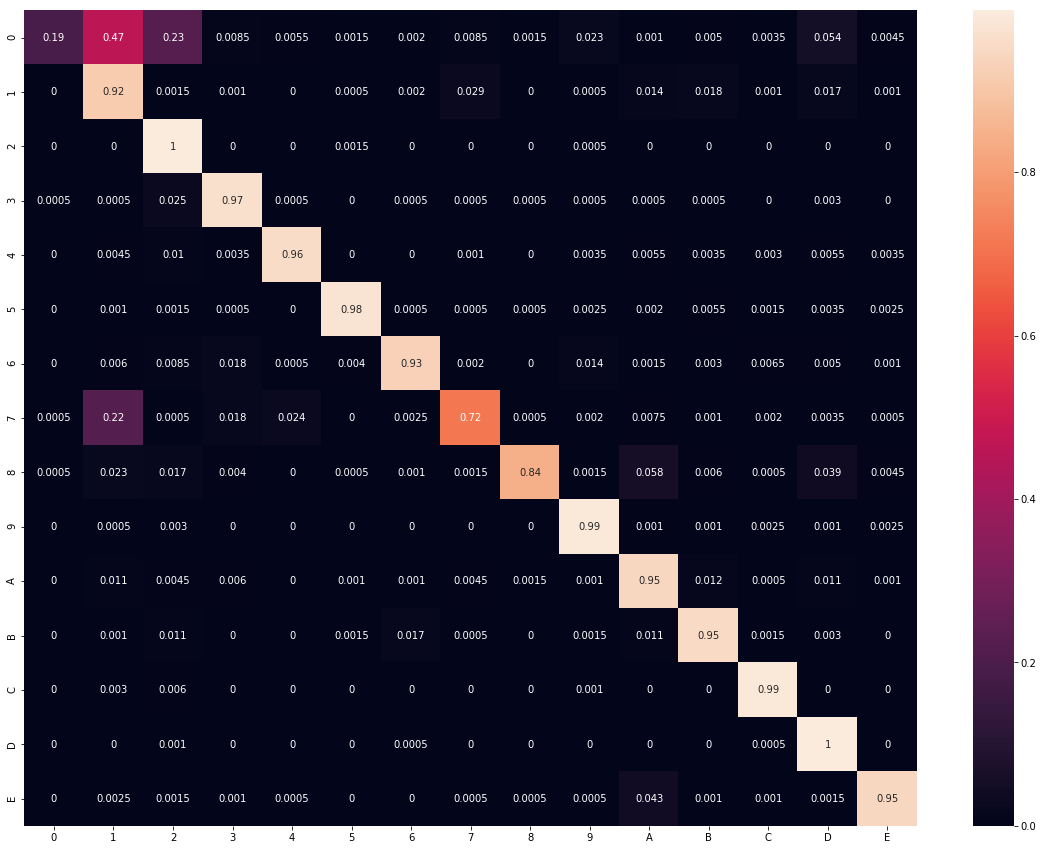

In [12]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
array = confusion_matrix(y_test, y_pred)
cm=np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789ABCDE"],
                  columns = [i for i in "0123456789ABCDE"])
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

In [13]:
print('Naive Bayes Train Accuracy = ',metrics.accuracy_score(y_train,gs_clf.predict(X_train)))
print('Naive Bayes Test Accuracy = ',metrics.accuracy_score(y_test,gs_clf.predict(X_test)))

Naive Bayes Train Accuracy =  0.9645689862679137
Naive Bayes Test Accuracy =  0.8877629254308477


In [14]:
print(gs_clf.predict(['http://www.businesstoday.net/']))
print(gs_clf.predict(['http://www.gamespot.net/']))

['Business']
['Games']
